# Анализ результатов A/B теста

## Введение

Шестой учебный проект.  
Крупным интернет-магазином предоставлены данные о результате A/B теста и список гипотез для увеличения выручки.  
Необходимо приоритизировать гипотизы и проанализировать результаты A/B теста.  

## Приоритизация гипотез

Описание пердоставленных данных для оценки.

Файл `hypothesis.csv` 
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy import stats as st

# настраиваем отображение данных типа float
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
# приведем название колонок к общепринятому стандарту
hypothesis.columns = [x.lower() for x in hypothesis.columns]
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Предоставлено 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.  
Приоритизируем их по фреймворкам **ICE** и **RICE**     
Рассчитаем оценку каждой гипотезы по фреймворкам и сохраним результат в новых колонках ice_score и rice_score соответственно.  

In [4]:
# оцениваем гипотезы по фреймворку ICE
hypothesis['ice_score'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

# оцениваем гипотезы по фреймворку RICE
hypothesis['rice_score'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [5]:
print('Cписок гипотез, отсортированный по оценке ICE')
display(hypothesis.sort_values(by = 'ice_score', ascending = False))
print('*'*50)
print('Cписок гипотез, отсортированный по оценке RICE')
display(hypothesis.sort_values(by = 'rice_score', ascending = False))

Cписок гипотез, отсортированный по оценке ICE


,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.00
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.00
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.00
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.00
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.00


**************************************************
Cписок гипотез, отсортированный по оценке RICE


,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.00
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.00


При оценке по методу **Ice** тремм самыми перспективных гипотезами стали: 8, 0 и 7.  
А При оценке по методу **Rice**: 7, 2 и 0.  
Видим, что при оценке по методу **Ice** не учитывается параметр Reach (охват пользователей).   
Поэтому те гипотезы, связанные с изменениями, охват пользователей которых предполагается высоким поднялись в рейтинге **Rice**   
Для улучшивших свои позиции 7 и 2 гипотезы предполагаемый охват был оценен высоко: 10 и 8 соответственно.  

## Анализ A/B-теста

### Описание данных

Результаты A/B-теста описаны в файлах `orders.csv` и `visitors.csv`.

Файл `orders.csv`
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл `visitors.csv`
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [7]:
# создаем функцию для первичного ознакомление с датафреймами
def dataset_info(df):
    df.info()
    print('*'*50)
    display(df.describe())
    print('*'*50)
    display(df.head())
    print('*'*50)
    print('Количество дубликатов в таблице:', df.duplicated().sum())

In [8]:
dataset_info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
**************************************************


,transactionId,visitorId,revenue
count,"1,197.00","1,197.00","1,197.00"
mean,"2,155,621,385.53","2,165,960,143.10","8,348.01"
std,"1,229,084,904.76","1,236,014,192.15","39,191.13"
min,"1,062,393.00","5,114,589.00",50.00
25%,"1,166,775,572.00","1,111,826,046.00","1,220.00"
50%,"2,145,193,898.00","2,217,984,702.00","2,978.00"
75%,"3,237,740,112.00","3,177,606,451.00","8,290.00"
max,"4,293,855,558.00","4,283,872,382.00","1,294,500.00"


**************************************************


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


**************************************************
Количество дубликатов в таблице: 0


In [9]:
dataset_info(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
**************************************************


,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


**************************************************


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**************************************************
Количество дубликатов в таблице: 0


Видим, что в предоставленных датасетах нет пропусков и дубликатов.  
В таблице `orders` необходимо привести названия столбцов к общепринятому формату.   
В обоих таблицах типы данных указаны верно для всех столбцов, кроме столбцов `date`, приведем их к типу `datetime`     
Отмечу, что колонка `revenue` в таблице `orders` подвержена выбросам. Медианное значение в данной колонке - 2,978, а среднее 8,348. Максимальное значение (1,294,500) в этой колонке и есть пример такого выброса.

In [10]:
# изменяем тип данных столбцов date на datetime
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

# приводим название столбцов таблицы orders к общепринятому формату
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

### Кумулятивные метрики

#### Кумулятивная выручка по группам

Найдем и визуализируем кумулятивную выручку по группам.

In [11]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

In [12]:
# получаем агрегированные кумулятивные по дням данные о заказах
orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1
).sort_values(by=['date', 'group'])

orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [13]:
#Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1
).sort_values(by=['date', 'group'])

visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [14]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [15]:
# создадим отдельные датасеты с кумулятивными данными для каждой группы теста
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

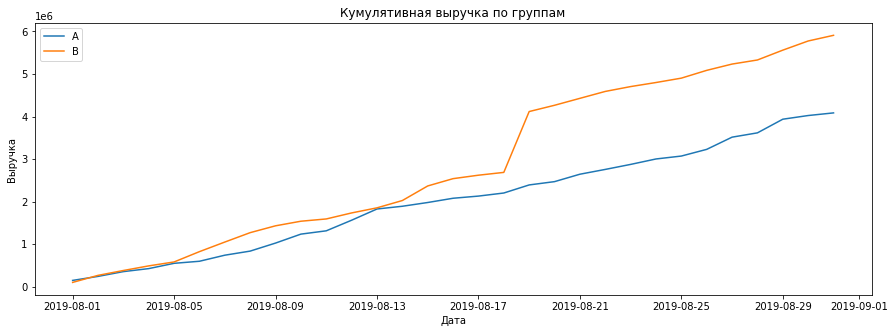

In [16]:
# построим график кумулятивной выручки по группам
plt.figure(figsize=(15,5))
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.plot(cumulative_data_a['date'], cumulative_data_a['revenue'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['revenue'], label='B')
plt.legend();

Видим, что 19 августа 2019 года кумулятивная выручка группы B резко выросла, хотя в остальное время она равномерно увеличивается в течение всего теста.  
Подозреваю, что это может быть связано с выбросом в значениях выручки с заказа в группе B.  
Также такая картина могла проявиться и из-за всплеска количества заказов в группе B, что менее вероятно, так как значения количество посетителей сайта менее подвержена выбросам. Среднее и медиана в данной колонке близки.

#### Кумулятивные значения среднего чека по группам

Найдем и визуализируем кумулятивные значения среднего чека по группам.  
Для этого разделим кумулятивную выручку на кумулятивное число заказов.

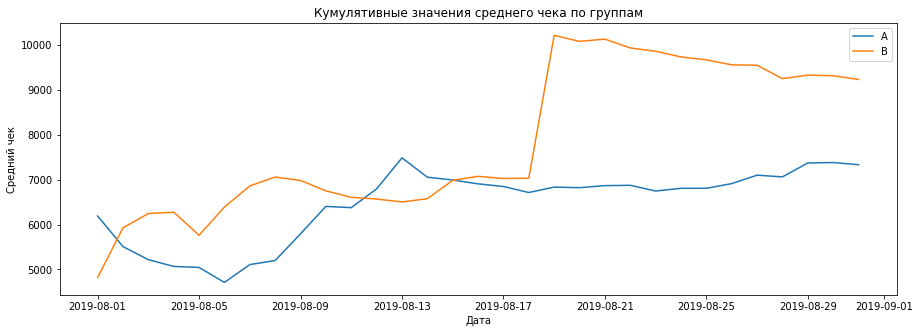

In [17]:
plt.figure(figsize=(15,5))
plt.title('Кумулятивные значения среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.plot(cumulative_data_a['date'],
         cumulative_data_a['revenue'] / cumulative_data_a['orders'],
         label='A')
plt.plot(cumulative_data_b['date'],
         cumulative_data_b['revenue'] / cumulative_data_b['orders'],
         label='B')
plt.legend();

Видим, что 19 августа 2019 года кумулятивное значение среднего чека группы B резко выросло, это подтверждает догадку о выбросах в значениях выручки с заказа в эту дату.

#### Относительные изменения кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека.

In [18]:
# собираем данные в одном датафрейме
merged_сumulative_revenue = cumulative_data_a.merge(cumulative_data_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

merged_сumulative_revenue.head()

,date,group_a,orders_a,buyers_a,revenue_a,visitors_a,group_b,orders_b,buyers_b,revenue_b,visitors_b
0,2019-08-01,A,24,20,148579,719,B,21,20,101217,713
1,2019-08-02,A,44,38,242401,1338,B,45,43,266748,1294
2,2019-08-03,A,68,62,354874,1845,B,61,59,380996,1803
3,2019-08-04,A,84,77,425699,2562,B,78,75,489567,2573
4,2019-08-05,A,109,100,549917,3318,B,101,98,581995,3280


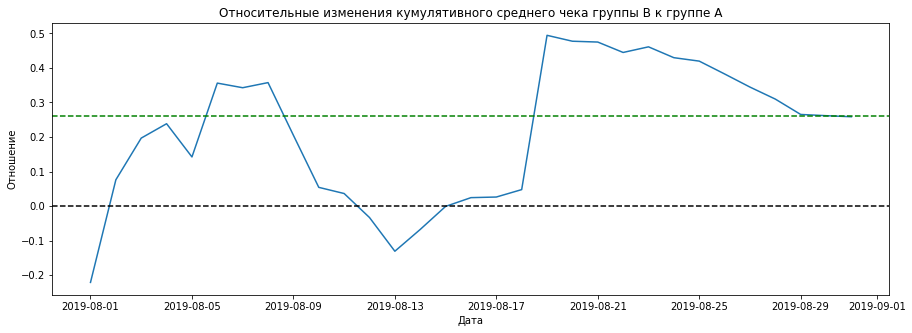

In [19]:
# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.plot(merged_сumulative_revenue['date'], (merged_сumulative_revenue['revenue_b']/merged_сumulative_revenue['orders_b'])/(merged_сumulative_revenue['revenue_a']/merged_сumulative_revenue['orders_a'])-1)
plt.title('Относительные изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.26, color='green', linestyle='--');

Видим, что на графике есть резкие скачки отношения среднего чека одной группы к другой, что еще раз подтверждает наличие аномально крупных заказов - выбросов.  
Кумулятивное значение среднего чека группы B больше на 26%.

#### Кумулятивные значения конверсии по группам

In [20]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

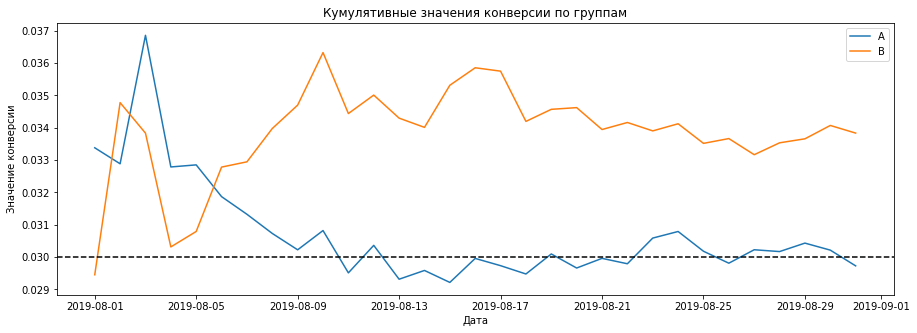

In [21]:
plt.figure(figsize=(15,5))
plt.title('Кумулятивные значения конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Значение конверсии')
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.axhline(y=0.030, color='black', linestyle='--');

plt.legend();

Значение куммулятивной конверсии группы B выше, чем для группы A.  
Значения конверсии для групп в начале колебались, но потом зафиксировались 9 августа с разницей в 4,5 пункта (0,034 против 0,0295).


#### Относительное изменения кумулятивной конверсии группы B к группе A

In [22]:
# собираем данные в одном датафрейме
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']], 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['_a', '_b']
    )

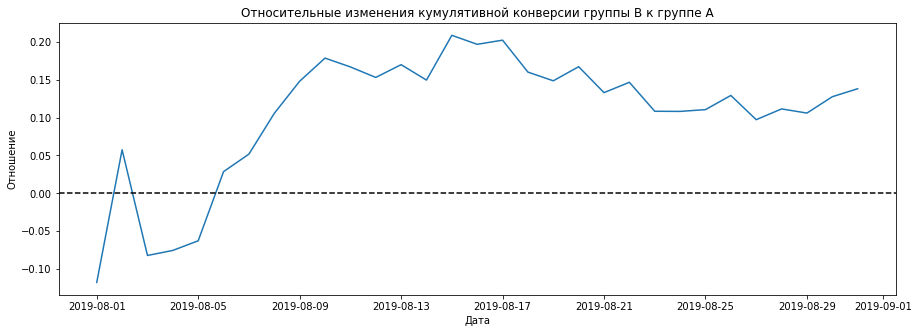

In [23]:
# cтроим график относительной конверсии
plt.figure(figsize=(15,5))
plt.title('Относительные изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение')
plt.plot(merged_cumulative_conversions['date'],
        (merged_cumulative_conversions['conversion_b']/(merged_cumulative_conversions['conversion_a']) - 1)
        );
plt.axhline(y=0, color='black', linestyle='--');

На момент изучения, отношение куммулятивной конверсии группы B выше, чем для группы A на 15%.  
Отношение конверсии для групп в начале переходило через 0, но после 6 августа конверсия группы стабильно выше.  
Судя по графику отношение конверсии зафиксировалось.

### Определение и анализ выбросов, аномальных значений

#### Аномальные значения в количестве заказов по пользователям

Для того, чтобы оценить наличие выбросов и аномальных значений в количестве заказов по пользователям, построим точечную диаграмму.

In [24]:
# посчитаем количество заказов для каждого пользователя
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

# переименуем колонку
orders_by_users.columns = ['visitor_id', 'orders_amount']
orders_by_users.head(5)

,visitor_id,orders_amount
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


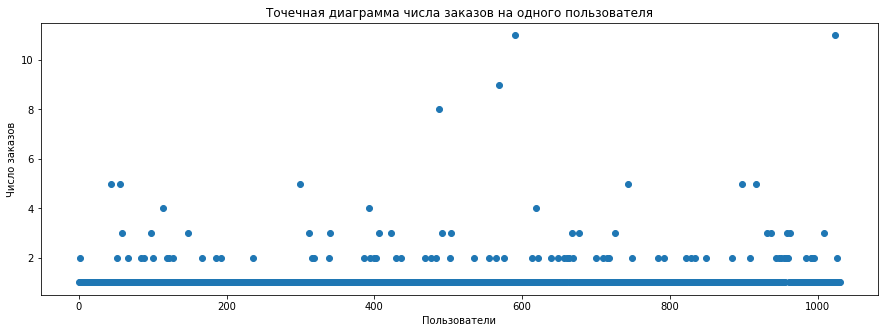

In [25]:
# построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders_by_users['orders_amount'])
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Число заказов');

Большая часть пользователей делает от 1-3 заказов. Пользователей, делающих 4 и более заказов совсем мало.  
Определим являются ли значения в 4 и более заказов аномальными.  
Посчитаем выборочные перцентили количества заказов на одного пользователя.

In [26]:
np.percentile(orders_by_users['orders_amount'], [90, 95, 99])

array([1., 2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа.
 
Примем 2 заказа как верхнюю границу нормальных значений.  
3 и более заказов на одного пользователя будем считать выбросами.  

#### Аномальные значения в стоимости заказов

Для того, чтобы оценить наличие выбросов и аномальных значений в стоимости заказов, построим точечную диаграмму.

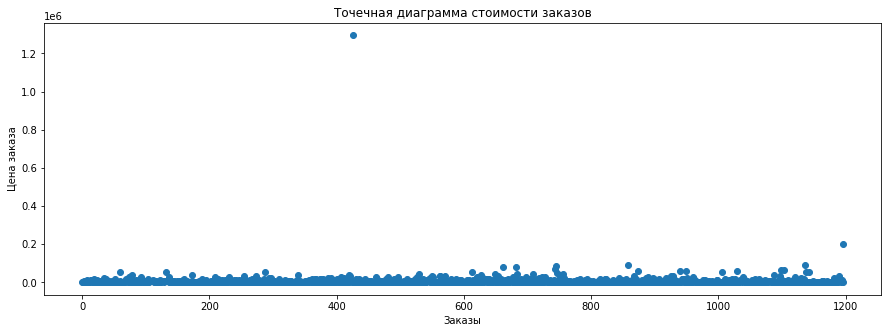

In [27]:
# построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(orders)))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Цена заказа');

Один аномально большой заказ не позволяет оценить остальное распределение, ограничим масштаб графика по y.

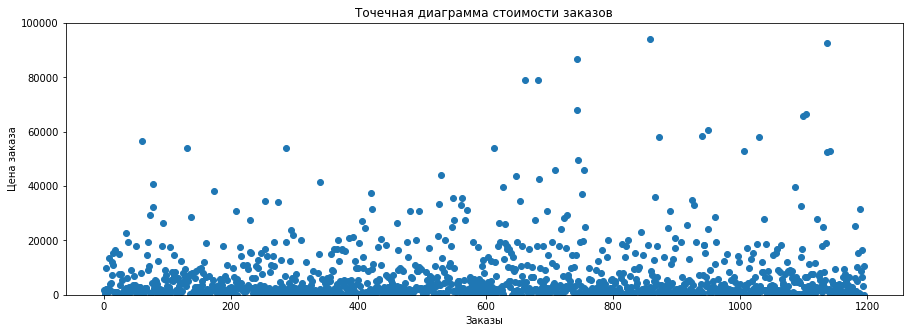

In [28]:
# построим точечную диаграмму числа заказов на одного пользователя, ограничим значения стоимости заказов
x_values = pd.Series(range(0,len(orders)))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Цена заказа')
plt.ylim(0, 100000);

Большая часть заказом были дешевле 30000.  
Определим выборочные перцентили стоимости заказа, чтобы точно отбросить выбросы в будущем.

In [29]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Не более 5% заказов стоили больше 28000.

Примем это значение стоимости заказа как верхнюю границу нормальных значений.  
Заказы дороже 28000 будем считать аномальными.

### Статистическая значимость различий показателей

Подготовим таблицу для оценки значимости различий показателей и результатов AB теста.

In [30]:
# определим количество пользователей группы А в день
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']
visitors_a_daily.head()

,date,visitors_per_date_a
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [31]:
# определим количество пользователей группы В в день
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']
visitors_b_daily.head()

,date,visitors_per_date_b
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [32]:
# определим кумулятивное количество пользователей группы А в день
visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']]
    .agg({'date': 'max', 'visitors_per_date_a': 'sum'}), axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']
visitors_a_cummulative.head()

,date,visitors_cummulative_a
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [33]:
# определим кумулятивное количество пользователей группы B в день
visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']]
    .agg({'date': 'max', 'visitors_per_date_b': 'sum'}), axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']
visitors_b_cummulative.head()

,date,visitors_cummulative_b
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [34]:
# определим количество заказов и суммарную выручку группы А в день
orders_a_daily = (orders[orders['group'] == 'A'][['date', 'transaction_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id':pd.Series.nunique, 'revenue':'sum'})
    )
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']
orders_a_daily.head()

,date,orders_per_date_a,revenue_per_date_a
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [35]:
# определим количество заказов и суммарную выручку группы B в день
orders_b_daily = (orders[orders['group'] == 'B'][['date', 'transaction_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id':pd.Series.nunique, 'revenue':'sum'})
    )
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']
orders_b_daily.head()

,date,orders_per_date_b,revenue_per_date_b
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


In [36]:
# определим кумулятивное количество заказов и суммарную выручку группы А в день
orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']]
    .agg({'date':'max', 'orders_per_date_a':'sum', 'revenue_per_date_a':'sum'}), axis=1)
orders_a_cummulative.columns = ['date', 'orders_cummulative_a', 'revenue_cummulative_a']
orders_a_cummulative.head()

,date,orders_cummulative_a,revenue_cummulative_a
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [37]:
# определим кумулятивное количество заказов и суммарную выручку группы B в день
orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']]
    .agg({'date':'max', 'orders_per_date_b':'sum', 'revenue_per_date_b':'sum'}), axis=1)
orders_b_cummulative.columns = ['date', 'orders_cummulative_b', 'revenue_cummulative_b']
orders_b_cummulative.head()

,date,orders_cummulative_b,revenue_cummulative_b
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [38]:
# объединим найденные данные в одну таблицу
data = (orders_a_daily
    .merge(orders_b_daily, left_on='date', right_on='date', how='left')
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


#### Статистическая значимость различий в конверсии между группами по «сырым» данным.

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [39]:
# cоздаем переменную orders_by_users_a 
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

# cоздаем переменную orders_by_users_b
orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

display(orders_by_users_a.head())
orders_by_users_b.head()

,visitor_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Объявим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов.  
Тем, кто ничего не заказал, будут соответствовать нули.

In [40]:
# объявим переменные sample_a и sample_b
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders'
        )
    ],
    axis=0
)


sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders'
        )
    ],axis=0
) 

Применим статистический критерий Манна-Уитни к полученным выборкам.

Определим гипотезы:
* H0 - статистически значимых различий в конверсии между группами НЕТ
* H1 - статистически значимые различия в конверсии между группами ЕСТЬ

Критерий статистической значимости альфа зададим 0.05  
  
Дополнительно выведем относительный прирост конверсии группы А: конверсия группы А / конверсия группы В - 1.

In [41]:
print('p-value =', "{0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print('Относительный выигрыш группы B =', "{0:.1%}".format(sample_b.mean() / sample_a.mean() - 1))

p-value = 0.011
Относительный выигрыш группы B = 14.9%


**p-value** меньше 0.05 значит H0 гипотезу о том, что статистически значимых различий в конверсии между группами **НЕТ**,  **отвергаем**  
**Принимаем** альтернативную гипотезу H1 о том, что статистически значимые различия в конверсии между группами **ЕСТЬ**  
Относительный выигрыш группы B по параметру конверсии составляет **14.9%**.  

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке между группами по «сырым» данным.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.
Дополнительно найдём относительные различия в среднем чеке между группами.

Определим гипотезы:
* H0 - статистически значимых различий в среднем чеке между группами НЕТ
* H1 - статистически значимые различия в среднем чеке между группами ЕСТЬ

Критерий статистической значимости альфа зададим 0.05  

In [42]:
print('p-value =', "{0:.3f}".format(
    stats.mannwhitneyu(
        orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue']
    )[1])
)

print('Относительный выигрыш группы B =', "{0:.1%}".format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1))

p-value = 0.729
Относительный выигрыш группы B = 25.9%


**p-value** больше 0.05 значит H0 гипотезу о том, что статистически значимых различий в среднем чеке между группами **НЕТ**, **не отвергаем**

Хотя относительный выигрыш группы B по параметру среднего чека значительный и составляет целых 25.9%.

#### Статистическая значимость различий в конверсии между группами по «очищенным» данным.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей.  
Так мы уберём 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами.  
Сделаем срезы пользователей с числом заказов больше 2 — users_with_many_orders и пользователей, совершивших заказы дороже 28 000 — users_with_expensive_orders.  
Объединим их в таблице abnormal_users.

In [43]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 2]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Количество аномальных пользователей -', abnormal_users.shape[0])

Количество аномальных пользователей - 74


Подготовим выборки количества заказов по пользователям по группам теста, очистив данные от аномальных пользователей.

In [44]:
# объявим переменные sample_a_filtered и sample_b_filtered
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders'
        )
    ],
    axis=0
)


sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders'
        )
    ],axis=0
) 

In [45]:
# применим статистический критерий Манна-Уитни к полученным выборкам:
print('p-value =', "{0:.3f}".format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))

print('Относительный выигрыш группы B =', "{0:.1%}".format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1))

p-value = 0.013
Относительный выигрыш группы B = 17.3%


Результаты исследования конверсии практически не изменились.  
**p-value** увеличился с 0.011 до 0.013  
С учетом критерия статистической значимости альфа, равным 0.05 данного значения **p-value** недостаточно, чтобы принять нулевую гипотезу H0(статистически значимых различий в конверсии между группами **НЕТ**).  

**Принимаем** альтернативную гипотезу H1 о том, что статистически значимые различия в конверсии между группами **ЕСТЬ**  

Относительный выигрыш группы B увеличился с 14.9% до 17.3%.

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [46]:
# подготовим выборки по среднем чекам для каждой группы
filtered_orders_a = orders[
    np.logical_and(
        orders['group'] == 'A',
        np.logical_not(
            orders['visitor_id'].isin(abnormal_users)
        )
    )
]['revenue']


filtered_orders_b = orders[
    np.logical_and(
        orders['group'] == 'B',
        np.logical_not(
            orders['visitor_id'].isin(abnormal_users)
        )
    )
]['revenue']

In [47]:
# применим статистический критерий Манна-Уитни к очищенным выборкам среднего чека:
print('p-value =', "{0:.3f}".format(
    stats.mannwhitneyu(filtered_orders_a, filtered_orders_b)[1])
)

print('Относительный выигрыш группы A =', "{0:.1%}".format(filtered_orders_a.mean() / filtered_orders_b.mean() - 1))

p-value = 0.738
Относительный выигрыш группы A = 2.0%


При исследовании очищенных данных, **p-value** возрасло с 0.729 до 0.738 при исследовании очищенных данных.
H0 гипотезу о том, что статистически значимых различий в среднем чеке между группами **НЕТ**, **не отвергаем**

Отмечу, что разница между средними чеками двух групп почти сошла на нет.  
При исследовании данных с выбросами, относительный выигрыш группы B в данном параметре составил 25.9%  
По очищенным данным лидирует группа А, но с небольшим отрывом, всего в 2%.


### Принятие решение по результатам теста

С высокой долей уверенности (a = 0,05) определено:
- Присутствуют статистически значимые различия в конверсии между группами и по очищенным и по сырым данным  
- Конверсия группы B выше на 17.3%  
- Статистически значимых различий в среднем чеке данным между группами НЕТ как по очищенным, так и по сырым данным
- Высокая относительная разница между средним чеком группы B и среднем чеком группы А (25.9%) при исследовании сырых данных связана с выбросами, после очистки разница между двумя группами по этому пораметру составила 2%, она статестически не значима.

Исходя из этого тест предлагаю считать завершенным и успешным.  
Лучше себя показала группа B, хоть статистической значимости в среднем чеке нет, группа B имеет более высокую конверсию, статистически значимую.  

## Вывод

**Приоритизация гипотез**  
При оценке по методу Ice тремм самыми перспективных гипотезами стали: 8, 0 и 7.  
А При оценке по методу Rice: 7, 2 и 0.  
Разница в приоритезации связана с тем, что при оценке по методу Ice не учитывается параметр Reach (охват пользователей).  

  
**Кумулятивные метрики**

- 19 августа 2019 года кумулятивная выручка группы B резко выросла, хотя в остальное время она, как и выручка группы А равномерно увеличивается в течение всего теста. Предположили влияние выбросов.
- 19 августа 2019 года кумулятивное значение среднего чека группы B резко выросло, что подтверждает предположение.
- Кумулятивное значение среднего чека группы B больше на 26%.
- Значение куммулятивной конверсии группы B выше на 15%, чем для группы A. 0,034 против 0,0295

**Аномальные значения**
- Не более 5% пользователей оформляли больше чем 2 заказа.
- Не более 5% заказов стоили больше 28000 рублей.
Данные значения были приняты как верхние границы неаномальных данных.
Выявлено 74 аномальных пользователей, их влияние не было учтено при Анализе A/B теста по очищенным данным.

**Статистическая значимость различий показателей**
С высокой долей уверенности (a = 0,05) определено:
- Присутствуют статистически значимые различия в конверсии между группами и по очищенным и по сырым данным  
- Конверсия группы B выше на 17.3%  
- Статистически значимых различий в среднем чеке данным между группами НЕТ как по очищенным, так и по сырым данным
- Высокая относительная разница между средним чеком группы B и среднем чеком группы А (25.9%) при исследовании сырых данных связана с выбросами, после очистки разница между двумя группами по этому пораметру составила 2%, она статестически не значима.

**Решение по результатам теста**   
Тест предлагаю считать завершенным и успешным.  
Лучше себя показала группа B, хоть статистической значимости в среднем чеке нет, группа B имеет более высокую конверсию, статистически значимую.      